In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as slinalg
from scipy.special import erf
from scipy.integrate import dblquad

import emulab.quadrature as eq


In [2]:
f = eq.tasks.CircularGaussian(mean=3., variance=0.5)

In [3]:
# create random samples X_2d uniformly in box
N_dat = 100
xmin, xmax  = (-5,5)
np.random.seed(0)
X_2d = np.random.uniform(xmin, xmax, (N_dat, 2))
Y_2d = f.evaluate(X_2d).reshape(-1,1)

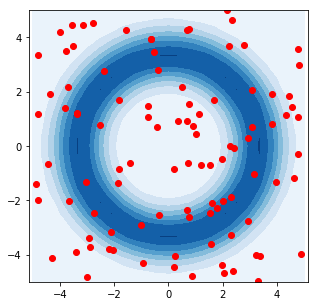

In [4]:
f.plot(25, np.array([-5,-5]), np.array([5,5]))
plt.scatter(X_2d[:,0], X_2d[:,1], c='r')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

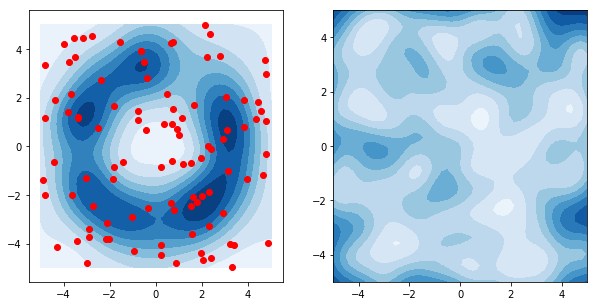

In [8]:
# define integral bounds
lower_bounds = -5.*np.ones((1, 2))
upper_bounds = 5.*np.ones((1, 2))
integral_bounds = eq.IntegralBounds(lower_bounds=lower_bounds, upper_bounds=upper_bounds)

k  = eq.kernels.IntegrableRBFGPy(input_dim=2, integral_bounds=integral_bounds, lengthscale=1., variance=1.)
gp = eq.surrogate.models.GPRegressionGPy(X_2d, Y_2d, k)                          
vbq = eq.surrogate.models.VanillaBayesianQuadratureGPy(gp, X_2d, Y_2d)

N_pred_2d = 50
x = np.linspace(xmin, xmax, N_pred_2d).reshape(-1,1)
X1, X2 = np.meshgrid(x, x, indexing='ij')
X_pred = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))

# Prediction based on posterior GP
m_2d, var_2d, _, _ = vbq.predict(X_pred, return_full_cov=False)

# # Plots
fig = plt.figure(figsize=(10,5))

# Plot the GP mean
ax1 = fig.add_subplot(121)
ax1.contourf(X1, X2, m_2d.reshape(N_pred_2d, N_pred_2d), cmap=plt.cm.Blues)
ax1.scatter(X_2d[:,0], X_2d[:,1], c='r')

# Plot the GP variance
ax2 = fig.add_subplot(122)
ax2.contourf(X1, X2, var_2d.reshape(N_pred_2d, N_pred_2d), cmap=plt.cm.Blues)
plt.show()


In [9]:
# Compute integral
print(vbq.integrate())

f.approximate_ground_truth_integral(np.array([-5,-5]), np.array([5,5]))[0]

(154.88594539317472, array([[104.25992045]]))


197.2136316363958